In [1]:
from glob import glob
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from polyphys.visualize import tuner
from polyphys.visualize import plotter
from polyphys.manage.parser import SumRuleCyl, TransFociCyl, HnsCub, HnsCyl
from polyphys.probe import logger

In [2]:
#glob('./*.log')
sorted(glob('/Users/amirhsi_mini/research_data/test_hns_cyl/N1000kbmm24nh0ac1r8lz675nc0ens1.ring/N*'))

['/Users/amirhsi_mini/research_data/test_hns_cyl/N1000kbmm24nh0ac1r8lz675nc0ens1.ring/N1000kbmm24nh0ac1r8lz675nc0ens1.ring.all.data',
 '/Users/amirhsi_mini/research_data/test_hns_cyl/N1000kbmm24nh0ac1r8lz675nc0ens1.ring/N1000kbmm24nh0ac1r8lz675nc0ens1.ring.all.log',
 '/Users/amirhsi_mini/research_data/test_hns_cyl/N1000kbmm24nh0ac1r8lz675nc0ens1.ring/N1000kbmm24nh0ac1r8lz675nc0ens1.ring.nucleoid.lammpstrj']

In [3]:
log = HnsCyl('/Users/amirhsi_mini/research_data/test_hns_cyl/N1000kbmm24nh0ac1r8lz675nc0ens1.ring/N1000kbmm24nh0ac1r8lz675nc0ens1.ring.all.log',
    'whole',
    'cylindrical',
    'all',
    'ring'
)

In [6]:
log.ensemble_long

'N1000kbmm24nh0ac1r8lz675nc0'

In [5]:
for key, val in log_data.run_data.items():
    print(key)
    print(len(val))

NameError: name 'log_data' is not defined

In [7]:
log_data = logger.LammpsLog('/Users/amirhsi_mini/research_data/test_hns_cyl/N200kbmm2r4.5nh0ac1lz75nc0ens5.ring/N200kbmm2r4.5nh0ac1lz75nc0ens5.ring.nuceloid.log', 1)

In [9]:
log_data.extract_thermo()
#log_data.extract_run_stat()
thermo = log_data.thermo
thermo.drop(index=0, inplace=True)
run_stat = log_data.run_stat
wall_time = log_data.wall_time

In [20]:
wall_time

,n_cores,n_atoms,wall_time_hr
0,1,200,1.51


In [10]:
melt_cols = ['KinEng', 'PotEng', 'E_vdwl', 'E_bond', 'E_angle']
thermo_melt = pd.melt(thermo, id_vars=['Step'], value_vars=melt_cols)
thermo_melt

,Step,variable,value
0,210000.0,KinEng,1.556826
1,220000.0,KinEng,1.481014
2,230000.0,KinEng,1.456184
3,240000.0,KinEng,1.447640
4,250000.0,KinEng,1.459170
...,...,...,...
50040,100160000.0,E_angle,0.758252
50041,100170000.0,E_angle,0.758460
50042,100180000.0,E_angle,0.800331
50043,100190000.0,E_angle,0.767552


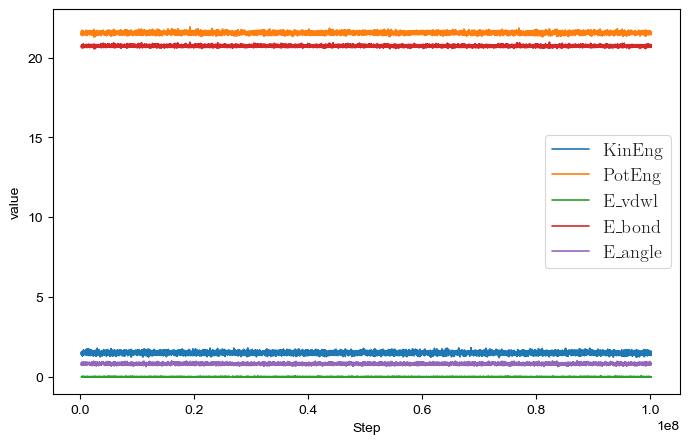

In [11]:
color_palette = 'tab10'
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
plot_context = 'paper'
font_scale = 1.5
height = 5
aspect = 1.618
ylabel_pad = 50
rc_params= {
    #'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    #'axes.grid': True,
    #'axes.grid.axis': 'both',
    #'axes.grid.which': 'both'
}

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(aspect*height, height), sharex=True)
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
ax = axes
ax = sns.lineplot(data=thermo_melt, x='Step', y='value', hue='variable')
ax.legend()
#ax.set_yscale('log')
#sns.lineplot(data=thermo, x='Step', y='E_mol', ax=ax)
fig.savefig('energy.pdf')